In [1]:
# ============================================================
# Google Colab environment setup (pinned versions)
# ============================================================

import sys
import os
import subprocess

if "google.colab" in sys.modules:
    print("Running in Google Colab")
    print("Python version:", sys.version.split()[0])

    # ---- Required package versions --------------------------
    requirements = {
        "numpy": "2.4.0",
        "scipy": "1.16.3",
        "matplotlib": "3.10.8",
        "pandas": "2.3.3",
    }

    # ---- Check currently loaded versions --------------------
    restart_needed = False

    for pkg, required_version in requirements.items():
        try:
            module = __import__(pkg)
            installed_version = module.__version__
        except Exception:
            installed_version = None

        print(f"{pkg}: {installed_version} (required: {required_version})")

        if installed_version != required_version:
            restart_needed = True

    # ---- Install if needed ----------------------------------
    if restart_needed:
        print("\nInstalling pinned package versions...")

        pip_args = [
            f"{pkg}=={ver}" for pkg, ver in requirements.items()
        ]

        subprocess.check_call(
            [sys.executable, "-m", "pip", "install", "-q", *pip_args]
        )

        print("Installation complete.")
        print("Restarting runtime to load correct packages...")

        # This will appear as a "crash" in Colab — expected behavior
        os.kill(os.getpid(), 9)

    else:
        print("\nAll required package versions already installed.")

else:
    print("Not running in Google Colab — setup skipped.")
    print("Python version:", sys.version.split()[0])

Not running in Google Colab — setup skipped.
Python version: 3.12.12


In [ ]:
# --- Version check ---
import numpy
import scipy
import matplotlib
import pandas

print("numpy:", numpy.__version__)
print("scipy:", scipy.__version__)
print("matplotlib:", matplotlib.__version__)
print("pandas:", pandas.__version__)

EA/L = 400000.0 N/mm
k =
 [[ 400000.       0. -400000.       0.]
 [      0.       0.       0.       0.]
 [-400000.       0.  400000.       0.]
 [      0.       0.       0.       0.]]

Case A: axial extension + transverse offset
u (mm) = [  0. 200. 100. 200.]
f (N)  = [-40000000.         0.  40000000.         0.]
delta = u3 - u1 (mm) = 100.0
state: tension

Case B: axial rigid + transverse skew
u (mm) = [300.   0. 300. 100.]
f (N)  = [0. 0. 0. 0.]
delta = u3 - u1 (mm) = 0.0
state: rigid (no axial strain)

Case C: axial shortening + opposite transverse
u (mm) = [ 200.  100.    0. -100.]
f (N)  = [ 80000000.         0. -80000000.         0.]
delta = u3 - u1 (mm) = -200.0
state: compression

Checks
k symmetric?  True
det(k) = 0.0


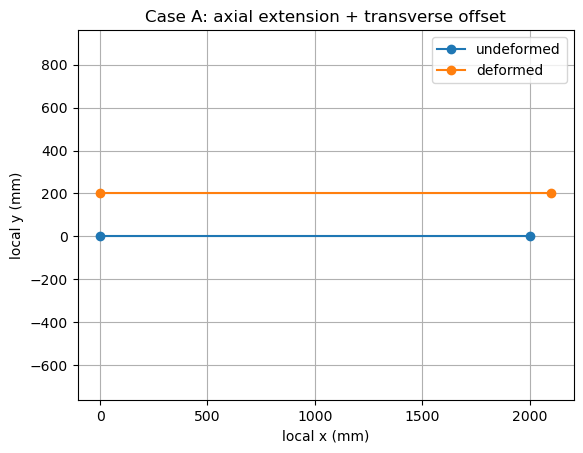

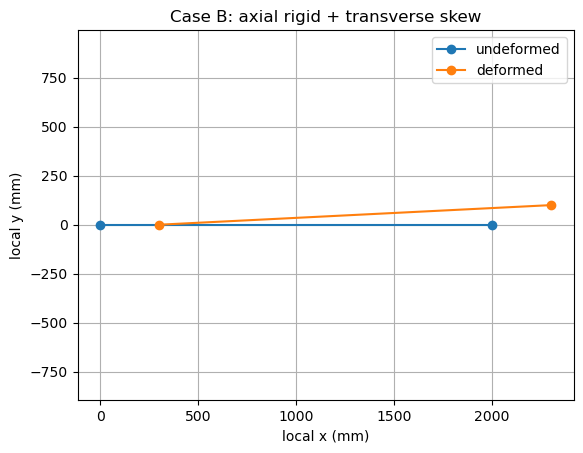

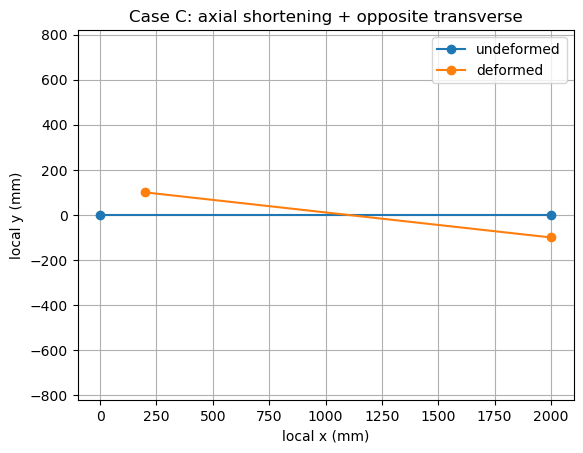

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------
# Given (CONSISTENT UNITS)
# --------------------------------
# E in MPa = N/mm^2
# A in mm^2
# L in mm
#
# Forces will come out in N

E = 200_000.0      # MPa = N/mm^2
A = 4000.0         # mm^2
L = 2000.0         # mm

k0 = E * A / L     # EA/L  (units: N/mm)
k = k0 * np.array([
    [ 1, 0, -1, 0],
    [ 0, 0,  0, 0],
    [-1, 0,  1, 0],
    [ 0, 0,  0, 0],
], dtype=float)

print("EA/L =", k0, "N/mm")
print("k =\n", k)

# --------------------------------
# Displacement cases (mm)
# u = [u1, u2, u3, u4]^T
# --------------------------------
cases = {
    "Case A: axial extension + transverse offset":
        np.array([0.0, 200.0, 100.0, 200.0]),
    "Case B: axial rigid + transverse skew":
        np.array([300.0, 0.0, 300.0, 100.0]),
    "Case C: axial shortening + opposite transverse":
        np.array([200.0, 100.0, 0.0, -100.0]),
}

def compute_forces(u):
    """Compute local nodal forces f = k u (N)."""
    return k @ u

def axial_deformation(u):
    """Axial deformation delta = u3 - u1 (mm)."""
    return u[2] - u[0]

def plot_element(u, title):
    """Plot undeformed and deformed element (local coordinates)."""
    # Undeformed
    x0 = np.array([0.0, L])
    y0 = np.array([0.0, 0.0])

    # Deformed
    x1 = np.array([u[0], L + u[2]])
    y1 = np.array([u[1], u[3]])

    plt.figure()
    plt.plot(x0, y0, marker="o", label="undeformed")
    plt.plot(x1, y1, marker="o", label="deformed")
    plt.axis("equal")
    plt.grid(True)
    plt.xlabel("local x (mm)")
    plt.ylabel("local y (mm)")
    plt.title(title)
    plt.legend()

# --------------------------------
# Run cases
# --------------------------------
for name, u in cases.items():
    f = compute_forces(u)
    delta = axial_deformation(u)

    print("\n" + name)
    print("u (mm) =", u)
    print("f (N)  =", f)
    print("delta = u3 - u1 (mm) =", delta)

    if np.isclose(delta, 0.0):
        state = "rigid (no axial strain)"
    elif delta > 0:
        state = "tension"
    else:
        state = "compression"

    print("state:", state)

    plot_element(u, name)

# --------------------------------
# Matrix checks
# --------------------------------
print("\nChecks")
print("k symmetric? ", np.allclose(k, k.T))
print("det(k) =", np.linalg.det(k))

plt.show()
